# Evaluation Metrics

## Accuracy Review
The accuracy should actually be no. of all data points labeled correctly divided by all data points. If we are looking at performance on a specific class, then we are looking at recall, which will be covered later in the lesson.

In [1]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

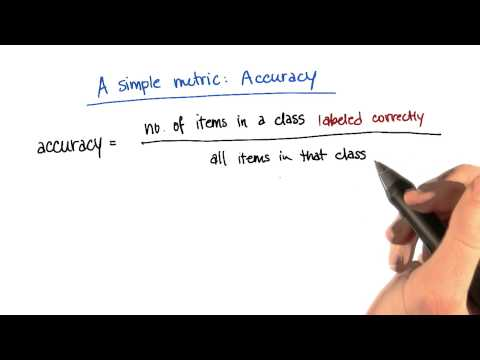

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/g3sxDtlGlAM'))

## Shortcomings of Accuracy

Accuracy is not particularly good if any of these cases apply to you. Precision and recall, which are the focus of this lecture, can really help.

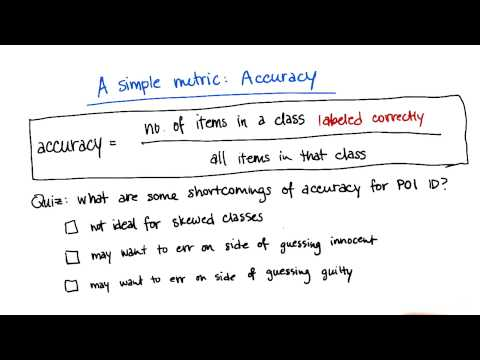

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/9JfaMZcSlQA'))

## Precision and Recall

**Recall:** True Positive / (True Positive + False Negative). Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.

**Precision:** True Positive / (True Positive + False Positive). Out of all the items labeled as positive, how many truly belong to the positive class.

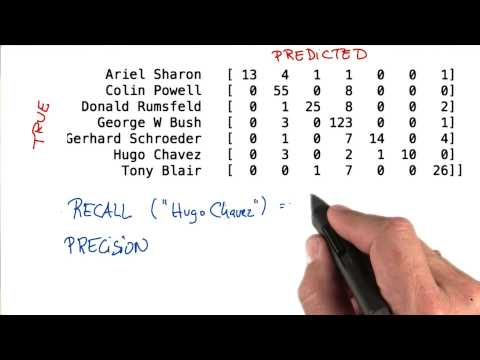

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/3vT0kSBCLdU'))

## True Positives in Eigenfaces

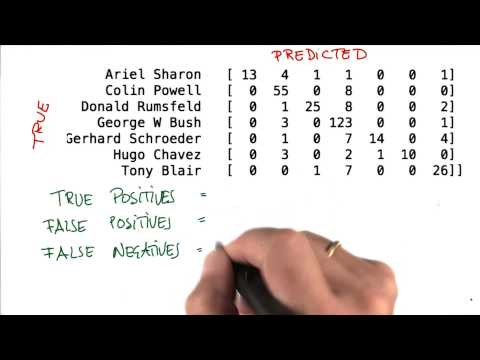

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/bgT8sWuV2lc'))

True Positive => Algorithm predicts Tony Blair and Reality is Tony Blair

False Positive => Algorithm predicts Tony Blair but Reality is others

False Negative => Algorithm predicts others but Reality is Tony Blair

For True positives, its 26

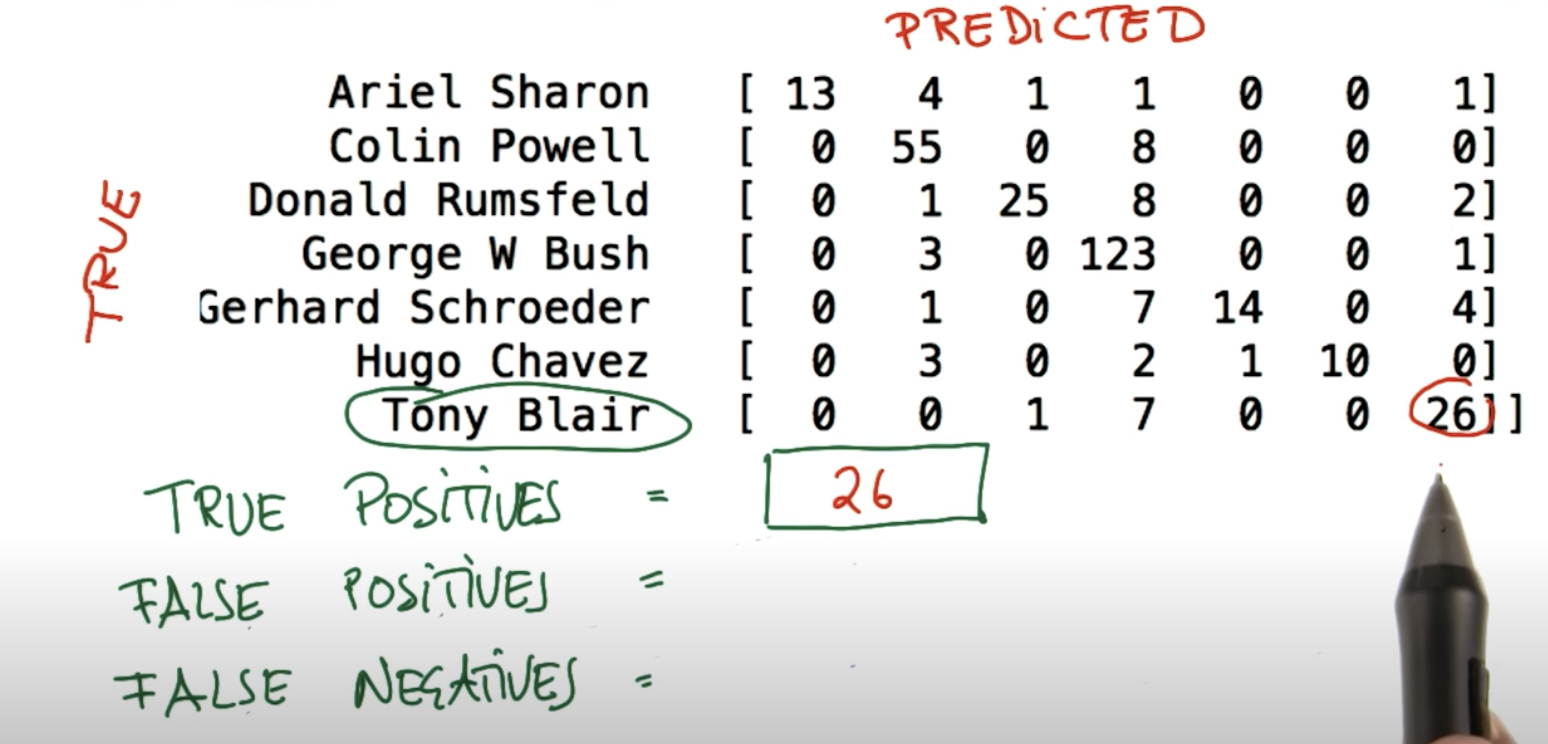

## False Positives in Eigenfaces

For False positives, its 8

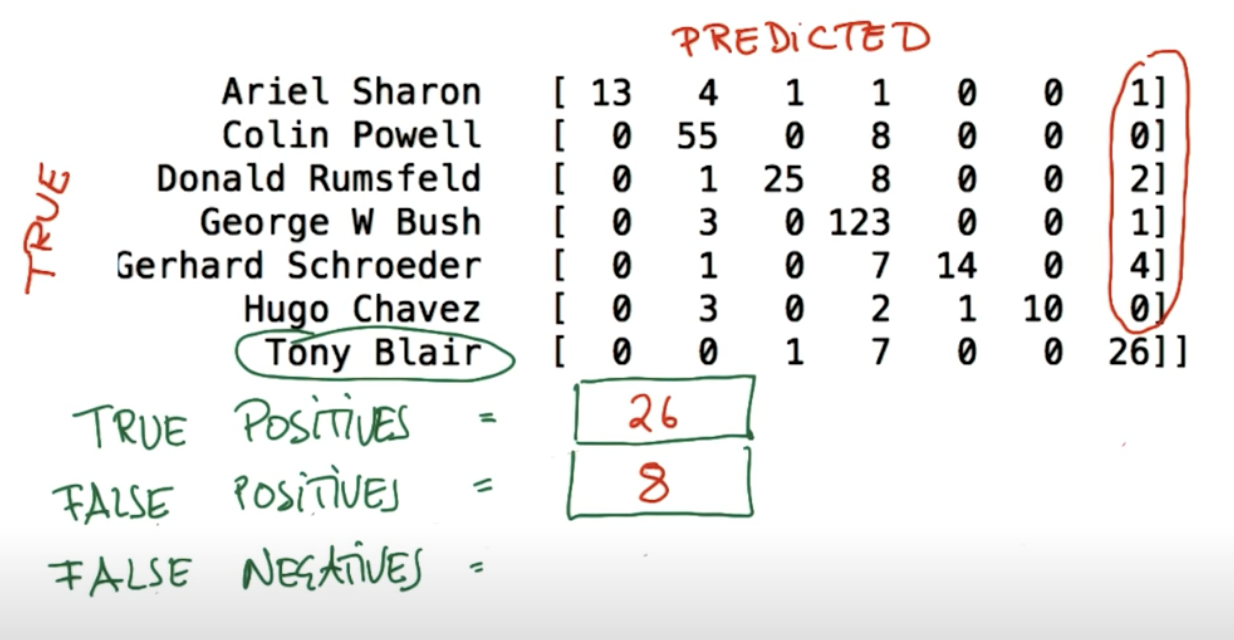

## False Negatives in Eigenfaces

For False negatives, its 8

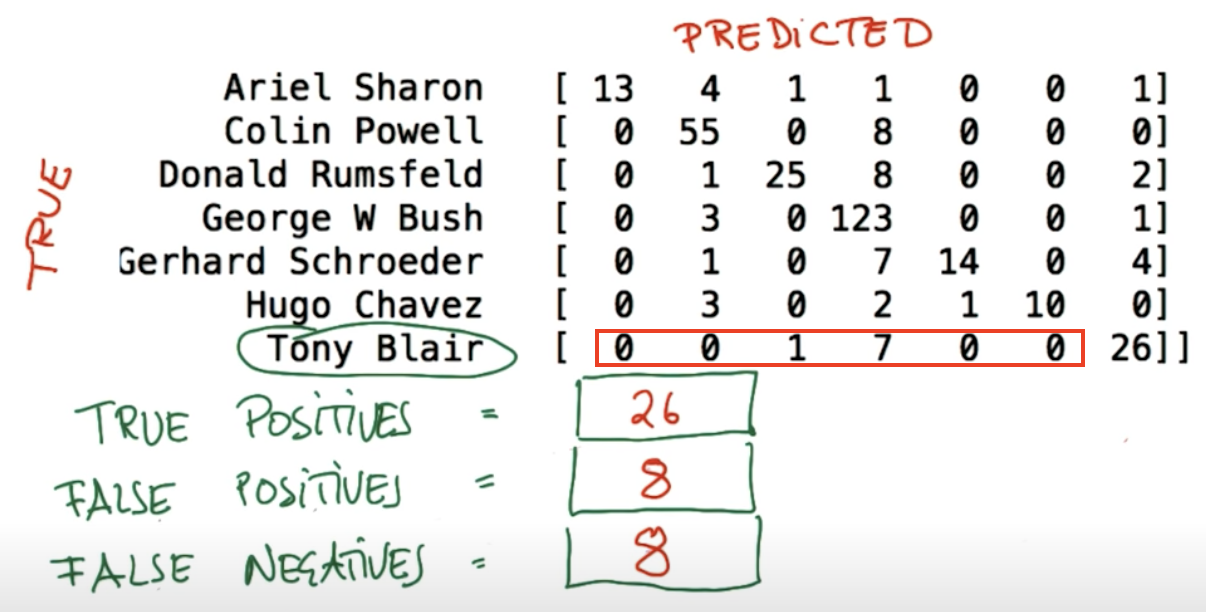

## Equation for Precision

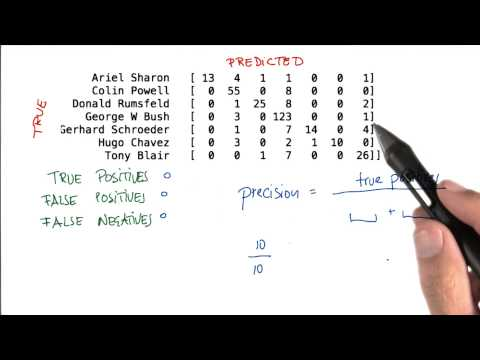

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/8QEAYYIyopY'))

$$
Precision = \frac{True  Positives}{True Positives + False Positives}
$$

Remember, the generalized notion

Given a **Subject**,

**True Positive** => Algorithm predicts **Subject** and Reality is Subject

**False Positive** => Algorithm predicts **Subject** but Reality is **others**

**False Negative** => Algorithm predicts **others** but Reality is **Subject**

**Positive** => always predicting the **Subject** and Negative, otherwise.

**True** => always Reality inline with **Prediction** and False, otherwise

## Equation for Recall

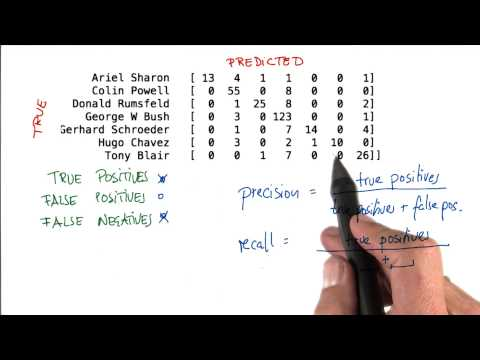

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/j2SP83afRS0'))

$$
Recall = \frac{True  Positives}{True Positives + False Negatives}
$$

# Evaluation Mini-Project

## Applying Metrics to Your POI Identifier

Go back to your code from the last lesson, where you built a simple first iteration of a POI identifier using a decision tree and one feature. Copy the POI identifier that you built into the skeleton code in evaluation/evaluate_poi_identifier.py. Recall that at the end of that project, your identifier had an accuracy (on the test set) of 0.724. Not too bad, right? Let’s dig into your predictions a little more carefully.

From Python 3.3 forward, a change to the order in which dictionary keys are processed was made such that the orders are randomized each time the code is run. This will cause some compatibility problems with the graders and project code, which were run under Python 2.7. To correct for this, add the following argument to the `featureFormat` call on line 25 of `evaluate_poi_identifier.py`:

sort_keys = '../tools/python2_lesson14_keys.pkl'

This will open up a file in the `tools` folder with the Python 2 key order.

In [11]:
#!/usr/bin/python


"""
    Starter code for the evaluation mini-project.
    Start by copying your trained/tested POI identifier from
    that which you built in the validation mini-project.

    This is the second step toward building your POI identifier!

    Start by loading/formatting the data...
"""
import os
import joblib
import sys
sys.path.append(os.path.abspath("../tools/"))
from feature_format import featureFormat, targetFeatureSplit

data_dict = joblib.load(open("../final_project/final_project_dataset.pkl", "rb") )

### add more features to features_list!
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list, sort_keys = '../tools/python2_lesson14_keys.pkl')
labels, features = targetFeatureSplit(data)



### your code goes here 

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)

# Make predictions on the test set
pred = clf.predict(features_test)

## Number of POIs in Test Set

**How many POIs are predicted for the test set for your POI identifier?**

(Note that we said test set! We are not looking for the number of POIs in the whole dataset.)

In [18]:
# Count the number of predicted POIs
num_predicted_pois = sum(pred)

print("Number of predicted POIs:", num_predicted_pois)

Number of predicted POIs: 4.0


## Number of People in Test Set
**How many people total are in your test set?**

In [24]:
# Count the total number of people in the test set
total_people = len(labels_test)
print("Total number of people in the test set:", total_people)

Total number of people in the test set: 29


## Accuracy of a Biased Identifier
**If your identifier predicted 0. (not POI) for everyone in the test set, what would its accuracy be?**

In [34]:
labels_dummy = [0 for _ in range(len(labels_test))] # if predictor is 0 for all in test data..
acc = accuracy_score(labels_test, labels_dummy) # then what is the accuracy..
acc

0.8620689655172413

`labels_dummy = [0 for _ in range(len(labels_test))]`: This creates a list of zeros with the same length as `labels_test`, simulating a case where your predictor predicts 0 for everyone.

`acc = accuracy_score(labels_test, labels_dummy)`: This calculates the accuracy by comparing `labels_test` (actual labels) with `labels_dummy` (predicted labels).

$$
Accuracy = \frac{Total Number of Predictions}{Number of Correct Predictions}
$$

Accuracy_score function compares the predicted labels (labels_dummy in this case) with the true labels (labels_test). In your case, since both labels_test and labels_dummy are lists of length 29, the accuracy is calculated based on the matching elements between these two lists.

## Number of True Positives

Look at the predictions of your model and compare them to the true test labels. **Do you get any true positives?** (In this case, we define a true positive as a case where both the actual label and the predicted label are 1)

In [37]:
true_positives = sum(1 for true_label, predicted_label in zip(labels_test, pred) if true_label == 1 and predicted_label == 1)
print("True positives:", true_positives)

True positives: 0


## Unpacking Into Precision and Recall
As you may now see, having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that you can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy!

Precision and recall can help illuminate your performance better. Use the precision_score and recall_score available in sklearn.metrics to compute those quantities.

**What’s the precision?**

In [38]:
# Calculate precision and recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(labels_test, pred)

print("Precision:", precision)

Precision: 0.0


## Recall of Your POI Identifier
**What’s the recall?**

(Note: you may see a message like UserWarning: The precision and recall are equal to zero for some labels. Just like the message says, there can be problems in computing other metrics (like the F1 score) when precision and/or recall are zero, and it wants to warn you when that happens.)

Obviously this isn’t a very optimized machine learning strategy (we haven’t tried any algorithms besides the decision tree, or tuned any parameters, or done any feature selection), and now seeing the precision and recall should make that much more apparent than the accuracy did.

In [40]:
recall = recall_score(labels_test, pred)

print("Recall:", recall)

Recall: 0.0


## How Many True Positives?

In the final project you’ll work on optimizing your POI identifier, using many of the tools learned in this course. Hopefully one result will be that your precision and/or recall will go up, but then you’ll have to be able to interpret them.

Here are some made-up predictions and true labels for a hypothetical test set; fill in the following boxes to practice identifying true positives, false positives, true negatives, and false negatives. Let’s use the convention that “1” signifies a positive result, and “0” a negative.

predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]

true labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

**How many true positives are there?** 

In [48]:
predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]

true_labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

true_positives = sum(1 for true_label, predicted_label in zip(true_labels, predictions) if true_label == 1 and predicted_label == 1)
print("True Positives:", true_positives)

True Positives: 6


## How Many True Negatives?
**How many true negatives are there in this example?**

In [52]:
true_negatives = sum(1 for true_label, predicted_label in zip(true_labels, predictions) if true_label == 0 and predicted_label == 0)
print("True Negatives:", true_negatives)

True Negatives: 9


## False Positives?
**How many false positives are there?**

In [51]:
false_positives = sum(1 for true_label, predicted_label in zip(true_labels, predictions) if true_label == 0 and predicted_label == 1)
print("False Positives:", false_positives)

False Positives: 3


## False Negatives?
**How many false negatives are there?**

In [56]:
false_negatives = sum(1 for true_label, predicted_label in zip(true_labels, predictions) if true_label == 1 and predicted_label == 0)
print("False Negatives:", false_negatives)

False Negatives: 2


## Precision

$$
Precision = \frac{True  Positives}{True Positives + False Positives}
$$

**What's the precision of this classifier?**

In [55]:
precision = precision_score(true_labels, predictions)

print("Precision:", precision)

Precision: 0.6666666666666666


## Recall

$$
Recall = \frac{True  Positives}{True Positives + False Negatives}
$$

**What's the recall of this classifier?**

In [54]:
recall = recall_score(true_labels, predictions)

print("Recall:", recall)

Recall: 0.75


## Making Sense of Metrics 1

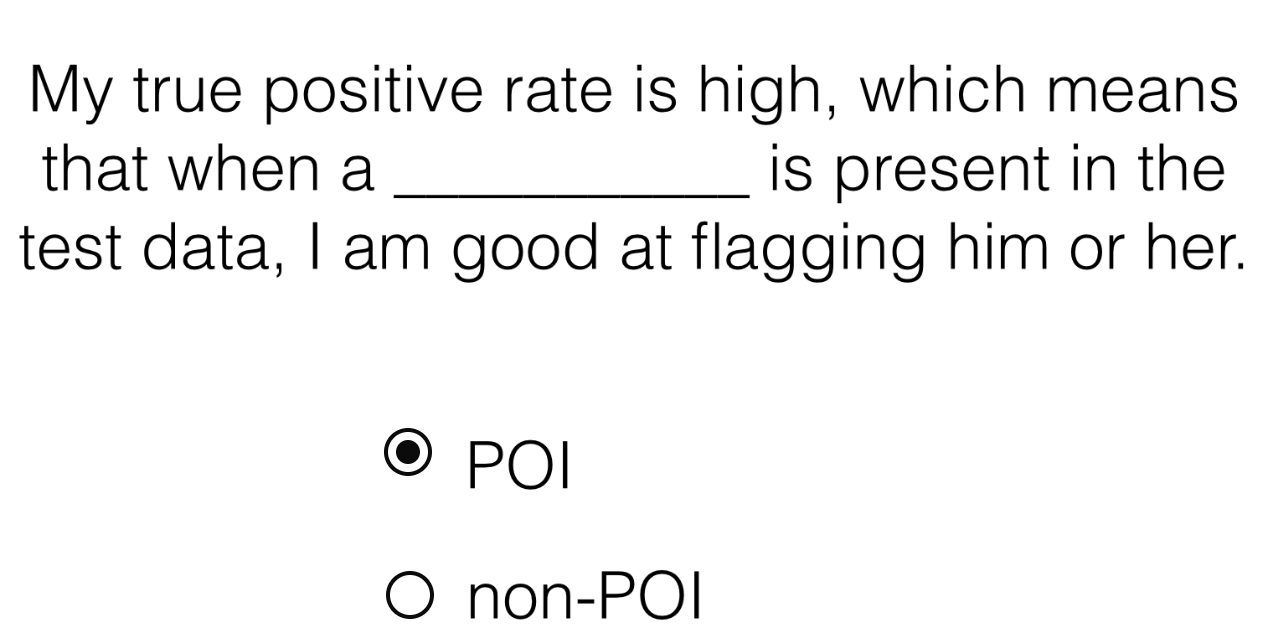

## Making Sense of Metrics 2
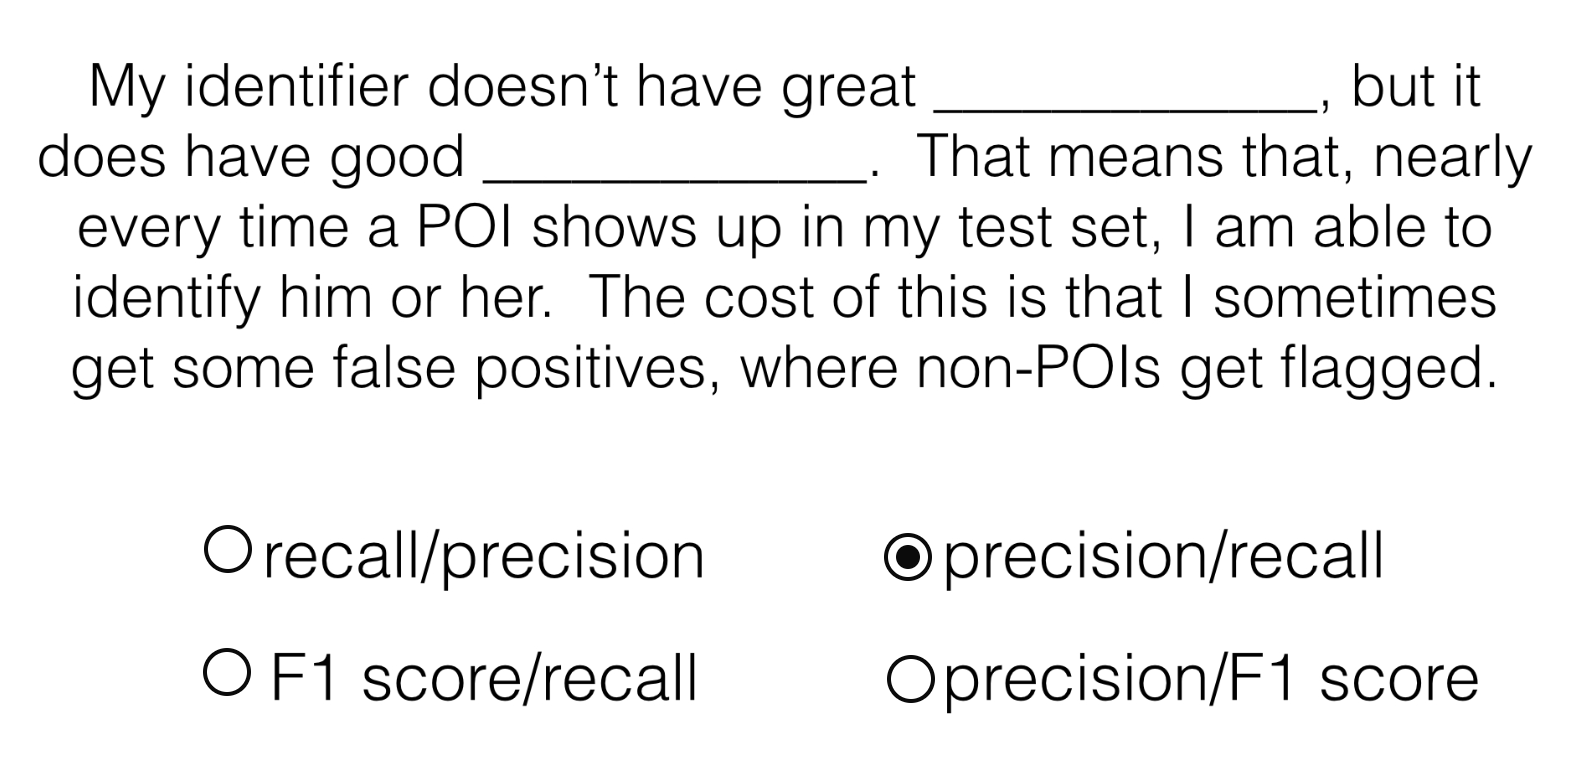

For an explanation of F1 score, check out [this link](https://en.wikipedia.org/wiki/F1_score).

False Positives mean they are negatives, but we treat them as positives. Non-POIs get flagged, which means they are non-POIs, but we flagged them as POIs.

When **False Positives** increase, the **precision** rate will decrease.

Precision formula:

$$
Precision = \frac{True  Positives}{True Positives + False Positives}
$$

## Making Sense of Metrics 3

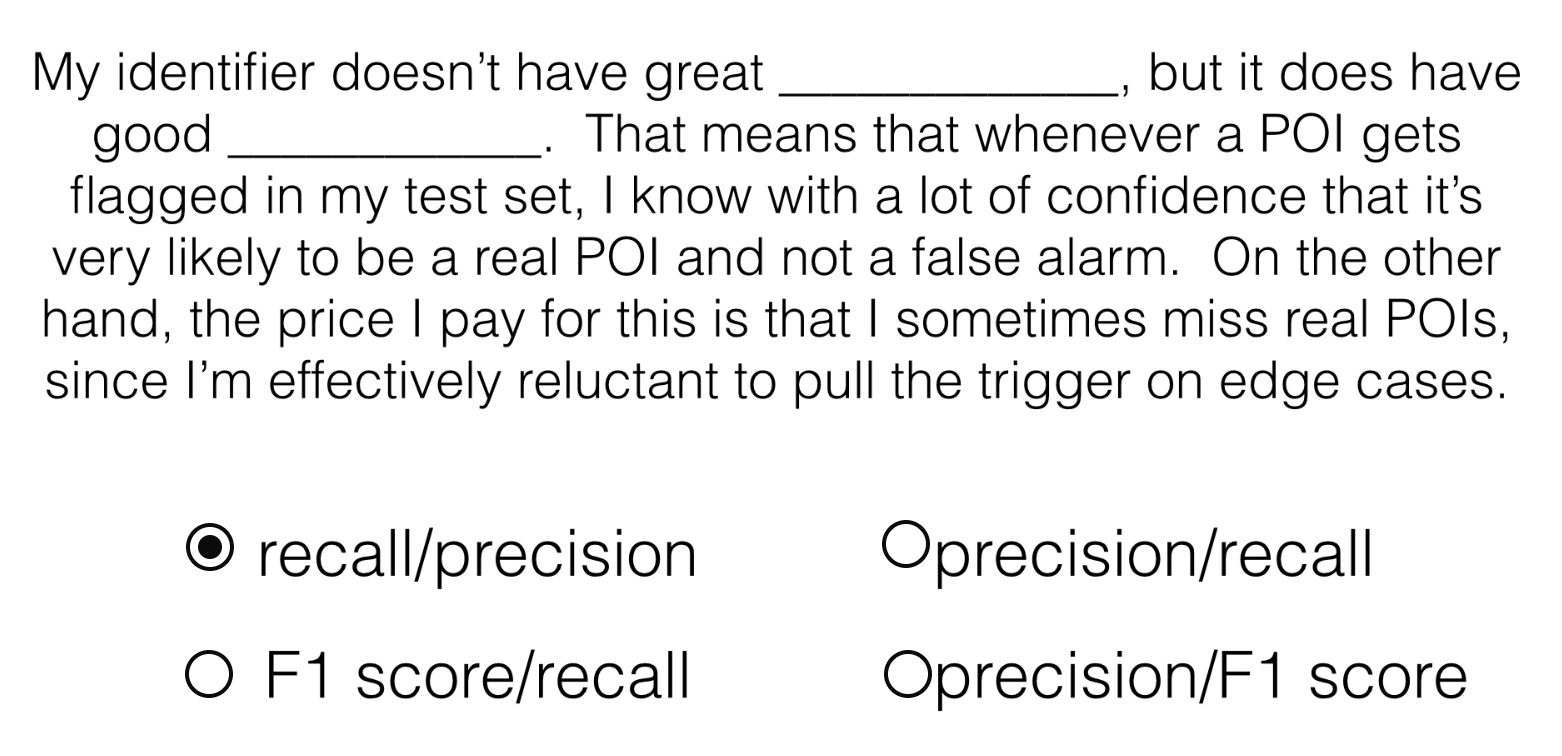

That means that whenever a POI gets flagged in my test set, I know with a lot of confidence that it's very likely to be a real POI and not a false alarm.

Here, it's very likely to be a real POI, which means there's a low possibility of getting the non-POIs. So, the `False Positives` is low, which means the `Precision` rate is high.

-----

On the other hand, the price I pay for this is that I sometimes miss real POIs since I'm effectively reluctant to pull the trigger on edge cases.

Miss real POIs means they are POIs, but we flagged them as non-POIs, which means `False Negatives` is high. When `False Negatives` increases, the `Recall` rate will decrease.

## Making Sense of Metrics 4

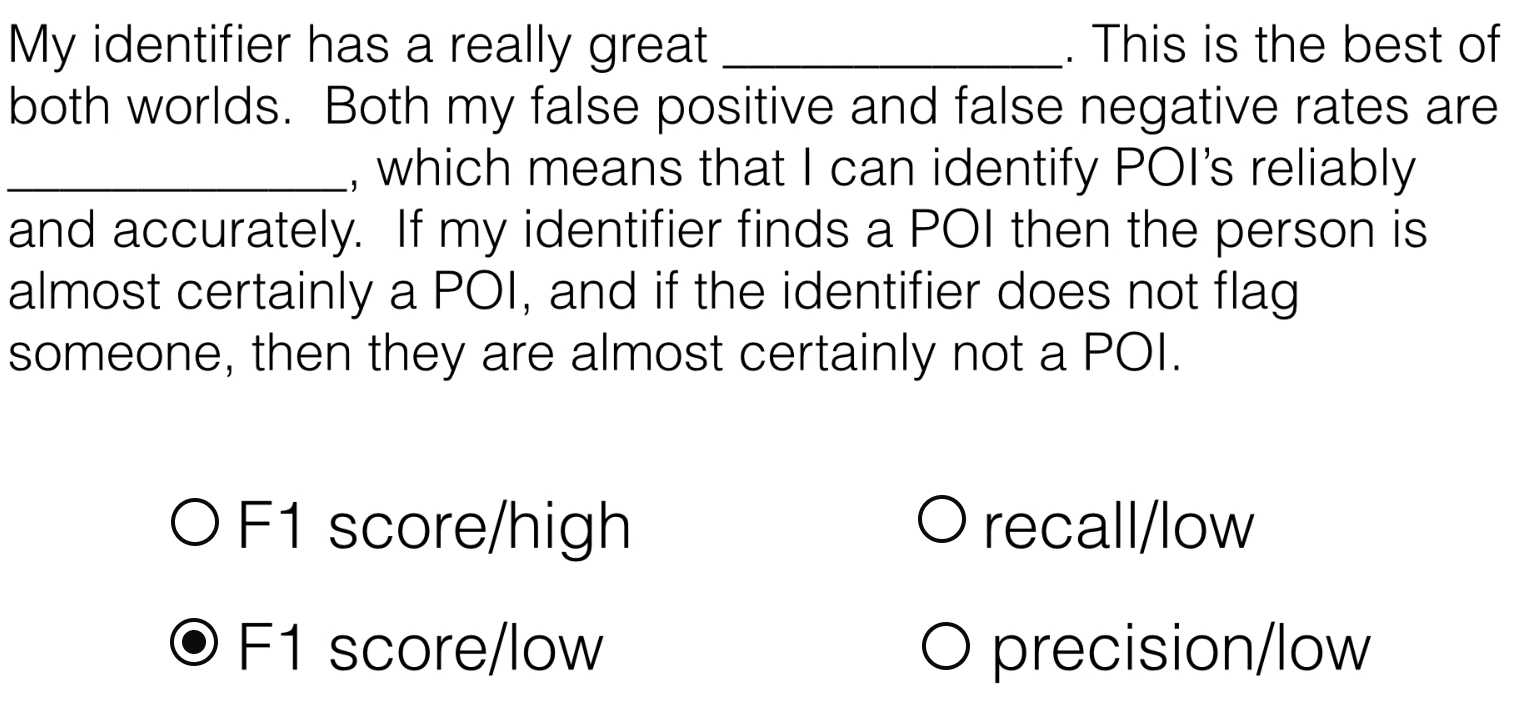

## Metrics for Your POI Identifier

There’s usually a tradeoff between precision and recall--which one do you think is more important in your POI identifier? There’s no right or wrong answer, there are good arguments either way, but you should be able to interpret both metrics and articulate which one you find most important and why.